# Importing dataset and libraries

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

In [ ]:
%cd /gdrive/My Drive/DIQ/_project

In [36]:
import numpy as np
import random
import pandas as pd

In [37]:
#defining inject outliers functions

def out_of_range(minimum, maximum):
    foo = ["up", "down"]
    f = random.choice(foo)
    dist = maximum - minimum

    if f == "up":
        number = random.uniform(maximum, maximum + dist*10)
    else:
        number = random.uniform(minimum - dist*10, minimum)

    return number

def check_datatypes(df):
    for col in df.columns:
        if (df[col].dtype == "bool"):
            df[col] = df[col].astype('string')
            df[col] = df[col].astype('object')
    return  df

def injection(df_pandas, seed, name, name_class):

    np.random.seed(seed)

    #%%

    df_list = []

    #percentuale di errori
    perc = [0.50, 0.40, 0.30, 0.20, 0.10]
    for p in perc:
        df_dirt = df_pandas.copy()
        comp = [p,1-p]
        df_dirt = check_datatypes(df_dirt)

        for col in df_dirt.columns:
            #per evitare di cancellare le class
            if col!=name_class:

                if (df_dirt[col].dtype != "object"):
                    minimum = float(df_dirt[col].min())
                    maximum = float(df_dirt[col].max())
                    rand = np.random.choice([True, False], size=df_dirt.shape[0], p=comp)
                    selected = df_dirt.loc[rand == True,col]
                    t=0
                    for i in selected:
                        selected.iloc[t:t+1] = out_of_range(minimum, maximum)
                        t+=1

                    df_dirt.loc[rand == True,col]=selected

        df_list.append(df_dirt)
        print("saved {}-accuracy{}%".format(name, round((1-p)*100)))
    return df_list


In [38]:
#importing data
ds_german_nodirty = pd.read_csv('german.csv')
ds_german_nodirty

,Age,Sex,Job,Housing,Saving_accounts,Checking_account,Credit_amount,Duration,Purpose,Risk
0,67,male,2,own,little,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,little,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad
...,...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,little,1736,12,furniture/equipment,good
996,40,male,3,own,little,little,3857,30,car,good
997,38,male,2,own,little,little,804,12,radio/TV,good
998,23,male,2,free,little,little,1845,45,radio/TV,bad


# Injecting outliers


In [39]:
#injecting outliers
ds_german_dirty = injection(ds_german_nodirty, 32, "german", "Risk")

saved german-accuracy50%
saved german-accuracy60%
saved german-accuracy70%
saved german-accuracy80%
saved german-accuracy90%


In [40]:
ds_german_dirty

[            Age     Sex        Job Housing Saving_accounts Checking_account  \
 0     67.000000    male   2.000000     own          little           little   
 1   -517.133416  female   2.000000     own          little         moderate   
 2     49.000000    male   1.000000     own          little           little   
 3     45.000000    male  23.657056    free          little           little   
 4     53.000000    male   2.000000    free          little           little   
 ..          ...     ...        ...     ...             ...              ...   
 995  407.487669  female   1.000000     own          little           little   
 996  119.900887    male  27.879062     own          little           little   
 997   38.000000    male -27.959879     own          little           little   
 998  475.341631    male   2.000000    free          little           little   
 999   27.000000    male   2.000000     own        moderate         moderate   
 
      Credit_amount    Duration       

In [41]:
df_german_10dirty = ds_german_dirty[4]
df_german_20dirty = ds_german_dirty[3]
df_german_30dirty = ds_german_dirty[2]
df_german_40dirty = ds_german_dirty[1]
df_german_50dirty = ds_german_dirty[0]

#Analyzing dataset with outliers

##Creating reports

In [42]:
#installing package to use pandas profiling on colab
#! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip 

In [43]:
#import library
import pandas_profiling as pp
from pandas_profiling import ProfileReport 

In [44]:
#generating report of the original dataset without outliers just for curiosity...
#profile_nodirty = ProfileReport(ds_german_nodirty, title="german", html={'style' : {'full_width':True}})
#profile_nodirty.to_file(output_file="german_nodirty_report.html") 

In [45]:
#generating report of the dataset with 10% outliers
#profile_10dirty = ProfileReport(df_german_10dirty, title="german_10%dirty", html={'style' : {'full_width':True}})
#profile_10dirty.to_file(output_file="german_10%dirty_report.html") 

In [46]:
#generating report of the dataset with 20% outliers
#profile_20dirty = ProfileReport(df_german_20dirty, title="german_20%dirty", html={'style' : {'full_width':True}})
#profile_20dirty.to_file(output_file="german_20%dirty_report.html") 

In [47]:
#generating report of the dataset with 10% outliers
#profile_30dirty = ProfileReport(df_german_30dirty, title="german_30%dirty", html={'style' : {'full_width':True}})
#profile_30dirty.to_file(output_file="german_30%dirty_report.html") 

In [48]:
#generating report of the dataset with 10% outliers
#profile_40dirty = ProfileReport(df_german_40dirty, title="german_40%dirty", html={'style' : {'full_width':True}})
#profile_40dirty.to_file(output_file="german_40%dirty_report.html") 

In [49]:
#generating report of the dataset with 10% outliers
#profile_50dirty = ProfileReport(df_german_50dirty, title="german_50%dirty", html={'style' : {'full_width':True}})
#profile_50dirty.to_file(output_file="german_50%dirty_report.html") 

# Data preparation

In [50]:
#here you can select which precentage of outliers in the dataset you want to have and the target class
ds_dirty = df_german_40dirty
target = 'Risk'

In [51]:
#dropping categorical 
def drop_categorical(dataset):
  df_noCat = dataset.drop(["Sex", "Housing", "Saving_accounts", "Checking_account", "Purpose", "Risk"], axis = 1) 
  return df_noCat

In [52]:
ds_dirty_noCat = drop_categorical(ds_dirty)
ds_dirty_noCat

,Age,Job,Credit_amount,Duration
0,67.000000,2.000000,1169.000000,651.798330
1,-459.352330,2.000000,5951.000000,48.000000
2,49.000000,1.000000,2096.000000,12.000000
3,78.051035,-26.364591,7882.000000,42.000000
4,53.000000,2.000000,4870.000000,24.000000
...,...,...,...,...
995,130.533865,31.103506,1736.000000,12.000000
996,40.000000,3.000000,141866.551456,30.000000
997,38.000000,2.000000,804.000000,12.000000
998,87.813476,-25.751614,164150.093484,-286.650375


In [53]:
#normalization of dataset

from sklearn.preprocessing import StandardScaler

def normalization(dataset):

  feature_cols = list(dataset.columns)

  X = dataset[1:][feature_cols] # Features

  numeric_columns=list(X.select_dtypes(include=['int64','float64']).columns)
  categorical_columns=list(X.select_dtypes(include=['bool','object']).columns)

  feature_columns = list(X.columns)

  if len(numeric_columns)!=0 and len(categorical_columns)==0:
      X = StandardScaler().fit_transform(X)

  X = np.nan_to_num(X)
  df_norm = pd.DataFrame(X, columns=feature_columns)

  return df_norm


In [54]:
ds_dirty_noCat_norm = normalization(ds_dirty_noCat)
ds_dirty_noCat_norm

,Age,Job,Credit_amount,Duration
0,-2.242962,-0.011980,0.025956,0.045192
1,0.013857,-0.092026,-0.029507,-0.088984
2,0.142828,-2.282465,0.053738,0.022830
3,0.031615,-0.011980,0.010403,-0.044259
4,-0.048296,-1.406892,0.070614,-2.100899
...,...,...,...,...
994,0.375825,2.317653,-0.034686,-0.088984
995,-0.026098,0.068067,1.981396,-0.021896
996,-0.034977,-0.011980,-0.048095,-0.088984
997,0.186169,-2.233398,2.301993,-1.202089


# Computing 2 algorithms for the classification task on the dataset with outliers



##Support Vector Machines

In [55]:
#metrics array to test different metrics
m = ['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'balanced_accuracy',
 'f1_macro',
 'f1_micro',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_weighted',
 'mutual_info_score',
 'normalized_mutual_info_score',
 'precision_macro',
 'precision_micro',
 'precision_weighted',
 'rand_score',
 'recall_macro',
 'recall_micro',
 'recall_weighted',
 'roc_auc',
 'v_measure_score']

In [56]:
from sklearn.svm import SVC
from sklearn.model_selection import ShuffleSplit, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

In [57]:
#used by the classification function
def encode_and_bind(original_dataframe, feature_to_encode):
    dummies = pd.get_dummies(original_dataframe[[feature_to_encode]], dummy_na=True)
    res = pd.concat([original_dataframe, dummies], axis=1)
    res = res.drop([feature_to_encode], axis=1)
    return(res)

In [58]:
#classification function for Support Vector Machines
def classification_SVM(dataset, class_name, metric):
  feature_cols = list(dataset.columns)
  feature_cols.remove(class_name)

  X = dataset[1:][feature_cols] # Features
  y = dataset[1:][class_name] # Target variable

  numeric_columns=list(X.select_dtypes(include=['int64','float64']).columns)
  categorical_columns=list(X.select_dtypes(include=['bool','object']).columns)

  for col in X.columns:
     if col in categorical_columns:
         X = encode_and_bind(X,col)

  feature_columns = list(X.columns)

  if len(numeric_columns)!=0 and len(categorical_columns)==0:
      X = StandardScaler().fit_transform(X)

  X = np.nan_to_num(X)
  X = pd.DataFrame(X, columns=feature_columns)

  clf = SVC(kernel="rbf") 


  dt_fit = clf.fit(X, y)

  cv = ShuffleSplit(n_splits=5, test_size=0.25, random_state=0)
  dt_scores = cross_val_score(dt_fit, X, y, cv = cv, scoring=metric)
  print(dt_scores.mean())
  return dt_scores.mean()

In [ ]:
#checking the different metrics with SVM
best_metric_value = 0
for x in m:
  print(x)
  value = classification_SVM(ds_dirty, target, x)
  if value > best_metric_value:
    best_metric_value = value

print("\nBest value:", best_metric_value)


In [60]:
#manually saved the best results (accuracy metric)
svm_10_preDet= 0.6984 
svm_20_preDet= 0.7
svm_30_preDet= 0.7064
svm_40_preDet= 0.7
svm_50_preDet= 0.7

## Decision trees

In [61]:
#classification function for Decision Trees
from sklearn.tree import DecisionTreeClassifier
def classification_DT(dataset, class_name, metric):
  feature_cols = list(dataset.columns)
  feature_cols.remove(class_name)

  X = dataset[1:][feature_cols] # Features
  y = dataset[1:][class_name] # Target variable

  numeric_columns=list(X.select_dtypes(include=['int64','float64']).columns)
  categorical_columns=list(X.select_dtypes(include=['bool','object']).columns)

  for col in X.columns:
     if col in categorical_columns:
         X = encode_and_bind(X,col)

  feature_columns = list(X.columns)

  if len(numeric_columns)!=0 and len(categorical_columns)==0:
      X = StandardScaler().fit_transform(X)

  X = np.nan_to_num(X)
  X = pd.DataFrame(X, columns=feature_columns)

  clf = DecisionTreeClassifier()


  dt_fit = clf.fit(X, y)

  cv = ShuffleSplit(n_splits=5, test_size=0.25, random_state=0)
  dt_scores = cross_val_score(dt_fit, X, y, cv = cv, scoring=metric)
  print(dt_scores.mean())
  return dt_scores.mean()

In [ ]:
#checking the different metrics with SVM
best_metric_value = 0
for x in m:
  print(x)
  value = classification_DT(ds_dirty, target, x)
  if value > best_metric_value:
    best_metric_value = value

print("\nBest value:", best_metric_value)

In [63]:
#manually saved the best results (accuracy metric)
dt_10_preDet= 0.6072 
dt_20_preDet= 0.6016
dt_30_preDet= 0.6064
dt_40_preDet= 0.5688000000000001
dt_50_preDet= 0.592

## 1 standard: Local Outlier Factor (distance based)

In [64]:
#thresholds used:
#10%outl: LOF_scores < -1.9
#20%outl: LOF_scores < -1.4
#30%outl: LOF_scores < -1.2
#40%outl: LOF_scores < -1.09
#50%outl: LOF_scores < -1.07

def LOF_outlier_detection(X):
    data = X

    from sklearn.neighbors import LocalOutlierFactor

    # fit the model for outlier detection (default)
    clf = LocalOutlierFactor(n_neighbors=4, contamination=0.1)

    clf.fit_predict(X)

    LOF_scores = clf.negative_outlier_factor_
    # Outliers tend to have a negative score far from -1

    outliers = X[LOF_scores < -1.09].index

    print("Outliers: ", data.iloc[outliers])

    return data.iloc[outliers]

In [65]:
outliers_LOF = LOF_outlier_detection(ds_dirty_noCat)

Outliers:              Age        Job  Credit_amount    Duration
1   -459.352330   2.000000    5951.000000   48.000000
6    128.172086  24.675206    2835.000000   24.000000
8    478.776392  31.126924 -170229.475866   12.000000
10    25.000000   2.000000  -75819.050731   79.871973
12    22.000000   2.000000    1567.000000   12.000000
..          ...        ...            ...         ...
992   23.000000   1.000000 -151141.475920   18.000000
993   30.000000   3.000000 -135747.170526   36.000000
995  130.533865  31.103506    1736.000000   12.000000
998   87.813476 -25.751614  164150.093484 -286.650375
999   27.000000   2.000000    4576.000000   45.000000

[428 rows x 4 columns]


In [66]:
#creating normalization
outliers_fromNorm_LOF = LOF_outlier_detection(ds_dirty_noCat_norm)

Outliers:            Age       Job  Credit_amount  Duration
2    0.142828 -2.282465       0.053738  0.022830
3    0.031615 -0.011980       0.010403 -0.044259
4   -0.048296 -1.406892       0.070614 -2.100899
5    0.365340  1.803090      -0.018874 -0.044259
7    1.921840  2.319527      -2.508783 -0.088984
..        ...       ...            ...       ...
989 -0.039417 -0.092026      -0.008372 -1.477848
990  1.164705 -1.531140       2.039111 -0.077803
994  0.375825  2.317653      -0.034686 -0.088984
997  0.186169 -2.233398       2.301993 -1.202089
998 -0.083812 -0.011980       0.006174  0.034011

[466 rows x 4 columns]


## 1 advances: KNN (model based)

In [ ]:
X = ds_dirty_noCat.values
X

In [68]:
#knn outlier detection function

from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
def knn_model_distances(values):
  # instantiate model
  nbrs = NearestNeighbors(n_neighbors = 3)
  # fit model
  nbrs.fit(values)
  # distances and indexes of k-neaighbors from model outputs
  distances, indexes = nbrs.kneighbors(values)
  # plot mean of k-distances of each observation
  plt.plot(distances.mean(axis =1))
  return distances

In [69]:
knn_model_distances(X)

array([[   0.        ,   80.45473828,   93.06715512],
       [   0.        ,  132.00413704,  260.03615328],
       [   0.        ,   28.58115362,   35.53871129],
       ...,
       [   0.        ,   16.43167673,   24.93992783],
       [   0.        ,  589.3862839 , 1124.98580579],
       [   0.        ,  103.46980236,  162.11360275]])

In [ ]:
#normalization version
Z = ds_dirty_noCat_norm.values
Z

In [71]:
knn_model_distances(Z)

array([[0.        , 0.09040876, 0.13419547],
       [0.        , 0.01506467, 0.02620627],
       [0.        , 0.22994608, 0.24826314],
       ...,
       [0.        , 0.0105812 , 0.01354638],
       [0.        , 0.81322856, 1.24489131],
       [0.        , 0.01241107, 0.03576736]])

In [72]:
# visually determine cutoff values according to the dataset:
#10% outliers: 300
#20% outliers: 250
#30% outliers: 250
#40% outliers: 230
#50% outliers: 240

outlier_index = np.where(knn_model_distances(X).mean(axis = 1) > 240)
np.size(outlier_index)

401

In [73]:
# visually determine cutoff values according to the dataset (normalized):
#10% outliers: 0.2
#20% outliers: 0.15
#30% outliers: 0.2
#40% outliers: 0.2
#50% outliers: 0.2

outlier_index_norm = np.where(knn_model_distances(Z).mean(axis = 1) > 0.2)
np.size(outlier_index_norm)

376

In [74]:
# filter outlier values
outliers_KNN = ds_dirty_noCat.iloc[outlier_index]
outliers_KNN

,Age,Job,Credit_amount,Duration
7,35.000000,-26.633562,92427.653312,36.000000
8,478.776392,31.126924,-170229.475866,12.000000
10,25.000000,2.000000,-75819.050731,79.871973
11,24.000000,3.362640,63719.451600,643.989886
13,1.080230,-15.549273,-167956.950076,24.000000
...,...,...,...,...
991,308.230371,-16.978483,145878.071609,15.000000
992,23.000000,1.000000,-151141.475920,18.000000
993,30.000000,3.000000,-135747.170526,36.000000
996,40.000000,3.000000,141866.551456,30.000000


In [75]:
# filter outlier values (normalized)
outliers_fromNorm_KNN = ds_dirty_noCat_norm.iloc[outlier_index_norm]
outliers_fromNorm_KNN

,Age,Job,Credit_amount,Duration
4,-0.048296,-1.406892,0.070614,-2.100899
6,-0.048296,-2.303995,1.270110,0.000467
7,1.921840,2.319527,-2.508783,-0.088984
12,-0.198882,-1.416737,-2.476087,-0.044259
18,-0.066054,1.491010,1.547248,-0.044259
...,...,...,...,...
976,-0.664687,-0.757459,-0.024744,1.867759
978,-0.092690,2.212243,-1.354026,-0.077803
979,1.238081,-0.011980,-2.657348,-0.021896
990,1.164705,-1.531140,2.039111,-0.077803


## deletion

In [76]:
#outliers detection/correction
#dropping the otuliers tuples

def outliers_deletion(dataset, outl):
  df_noOutliers = dataset.drop(outl.index, axis = 0)
  return df_noOutliers

In [77]:
#LOF
ds_dirty_noOut_LOF = outliers_deletion(ds_dirty, outliers_LOF)
ds_dirty_noOut_LOF
#KNN
ds_dirty_noOut_KNN = outliers_deletion(ds_dirty, outliers_KNN)
ds_dirty_noOut_KNN

,Age,Sex,Job,Housing,Saving_accounts,Checking_account,Credit_amount,Duration,Purpose,Risk
0,67.000000,male,2.000000,own,little,little,1169.0,651.798330,radio/TV,good
1,-459.352330,female,2.000000,own,little,moderate,5951.0,48.000000,radio/TV,bad
2,49.000000,male,1.000000,own,little,little,2096.0,12.000000,education,good
3,78.051035,male,-26.364591,free,little,little,7882.0,42.000000,furniture/equipment,good
4,53.000000,male,2.000000,free,little,little,4870.0,24.000000,car,bad
...,...,...,...,...,...,...,...,...,...,...
990,37.000000,male,1.000000,own,little,little,3565.0,-360.637595,education,good
994,50.000000,male,2.000000,own,little,little,2390.0,-497.291920,car,good
995,130.533865,female,31.103506,own,little,little,1736.0,12.000000,furniture/equipment,good
997,38.000000,male,2.000000,own,little,little,804.0,12.000000,radio/TV,good


In [78]:
#LOF-norm
ds_dirty_noOut_fromNorm_LOF = outliers_deletion(ds_dirty, outliers_fromNorm_LOF)
ds_dirty_noOut_fromNorm_LOF
#KNN-norm
ds_dirty_noOut_fromNorm_KNN = outliers_deletion(ds_dirty, outliers_fromNorm_KNN)
ds_dirty_noOut_fromNorm_KNN

,Age,Sex,Job,Housing,Saving_accounts,Checking_account,Credit_amount,Duration,Purpose,Risk
0,67.000000,male,2.000000,own,little,little,1169.000000,651.798330,radio/TV,good
1,-459.352330,female,2.000000,own,little,moderate,5951.000000,48.000000,radio/TV,bad
2,49.000000,male,1.000000,own,little,little,2096.000000,12.000000,education,good
3,78.051035,male,-26.364591,free,little,little,7882.000000,42.000000,furniture/equipment,good
5,35.000000,male,-15.426286,free,little,little,9055.000000,-527.804320,education,good
...,...,...,...,...,...,...,...,...,...,...
994,50.000000,male,2.000000,own,little,little,2390.000000,-497.291920,car,good
995,130.533865,female,31.103506,own,little,little,1736.000000,12.000000,furniture/equipment,good
996,40.000000,male,3.000000,own,little,little,141866.551456,30.000000,car,good
998,87.813476,male,-25.751614,free,little,little,164150.093484,-286.650375,radio/TV,bad


## correction

In [79]:
def outliers_deletion(dataset, outl):
  df_noOutliers = dataset.drop(outl.index, axis = 0)
  return df_noOutliers

In [80]:
#LOF
ds_dirty_noOut_LOF = outliers_deletion(ds_dirty, outliers_LOF)
ds_dirty_noOut_fromNorm_LOF = outliers_deletion(ds_dirty, outliers_fromNorm_LOF)
#KNN
ds_dirty_noOut_KNN = outliers_deletion(ds_dirty, outliers_KNN)
ds_dirty_noOut_fromNorm_KNN = outliers_deletion(ds_dirty, outliers_fromNorm_KNN)

In [81]:
def replace(df, columns, values):
    for one_column, one_value in zip(columns, values):
        df[one_column] = one_value

    return df

In [82]:
#I decided to substitute the outliers with the average corresponding attribute's values
def replace_all(outl, dataset):
  replace(outl, ["Age"], dataset[['Age']].mean())
  replace(outl, ["Job"], dataset[['Job']].mean())
  replace(outl, ["Credit_amount"], dataset[['Credit_amount']].mean())
  replace(outl, ["Duration"], dataset[['Duration']].mean())
  return outl

In [ ]:
#LOF
outliers_LOF_avg = replace_all(outliers_LOF, ds_dirty_noOut_LOF)
outliers_fromNorm_LOF_avg = replace_all(outliers_fromNorm_LOF, ds_dirty_noOut_fromNorm_LOF)
#KNN
outliers_KNN_avg = replace_all(outliers_KNN, ds_dirty_noOut_KNN)
outliers_fromNorm_KNN_avg = replace_all(outliers_fromNorm_KNN, ds_dirty_noOut_fromNorm_KNN)

In [84]:
#concat new values in the ds
def concat_df(dataset, outl):
  df = dataset.append(outl, ignore_index=True)
  return df

In [85]:
#LOF
ds_dirty_outFix_LOF = concat_df(ds_dirty_noOut_LOF, outliers_LOF_avg)
ds_dirty_outFix_fromNorm_LOF = concat_df(ds_dirty_noOut_fromNorm_LOF, outliers_fromNorm_LOF_avg)
#KNN
ds_dirty_outFix_KNN = concat_df(ds_dirty_noOut_KNN, outliers_KNN_avg)
ds_dirty_outFix_fromNorm_KNN = concat_df(ds_dirty_noOut_fromNorm_KNN, outliers_fromNorm_KNN_avg)

In [86]:
#avoid problem of NaN values
def replace_NaN(dataset):
  new = dataset.fillna('-')
  return new

In [87]:
#LOF
ds_dirty_outFix_LOF_noNan = replace_NaN(ds_dirty_outFix_LOF)
ds_dirty_outFix_fromNorm_LOF_noNan = replace_NaN(ds_dirty_outFix_fromNorm_LOF)
#KNN
ds_dirty_outFix_KNN_noNan = replace_NaN(ds_dirty_outFix_KNN)
ds_dirty_outFix_fromNorm_KNN_noNan = replace_NaN(ds_dirty_outFix_fromNorm_KNN)

# Computing the 2 algorithms for the classification task on the dataset after the deletion/correction of the outliers



##SVM

In [88]:
#SVM, outliers deleted
classification_SVM(ds_dirty_noOut_LOF, target, "accuracy")

0.6979020979020978


0.6979020979020978

In [89]:
classification_SVM(ds_dirty_noOut_KNN, target, "accuracy")

0.716


0.716

In [90]:
#SVM, outliers deleted (norm)
classification_SVM(ds_dirty_noOut_fromNorm_LOF, target, "accuracy")

0.6716417910447762


0.6716417910447762

In [91]:
classification_SVM(ds_dirty_noOut_fromNorm_KNN, target, "accuracy")

0.6730769230769231


0.6730769230769231

In [92]:
#SVM, outliers corrected with avg
classification_SVM(ds_dirty_outFix_LOF_noNan, target, "accuracy")

0.6208


0.6208

In [93]:
classification_SVM(ds_dirty_outFix_KNN_noNan, target, "accuracy")

0.7104


0.7104

In [94]:
#SVM, outliers corrected with avg (norm)
classification_SVM(ds_dirty_outFix_fromNorm_LOF_noNan, target, "accuracy")

0.6224


0.6224

In [95]:
classification_SVM(ds_dirty_outFix_fromNorm_KNN_noNan, target, "accuracy")

0.5312


0.5312

In [118]:
#manually saved the best results (accuracy metric)
#10%outliers: 
deleted_LOF_svm_10= 0.7083700440528634
deleted_KNN_svm_10= 0.7000000000000001
deleted_norm_LOF_svm_10= 0.7054852320675106
deleted_norm_KNN_svm_10= 0.6825112107623318
corrected_LOF_svm_10=0.6416000000000001
corrected_KNN_svm_10= 0.652
corrected_norm_LOF_svm_10= 0.6576000000000001
corrected_norm_KNN_svm_10= 0.6104
#20%outliers:
deleted_LOF_svm_20= 0.6911764705882353
deleted_KNN_svm_20= 0.7343283582089553
deleted_norm_LOF_svm_20= 0.7178217821782178
deleted_norm_KNN_svm_20= 0.7074626865671642
corrected_LOF_svm_20= 0.6848000000000001
corrected_KNN_svm_20= 0.5368
corrected_norm_LOF_svm_20= 0.5728000000000001
corrected_norm_KNN_svm_20= 0.556
#30%outliers:
deleted_LOF_svm_30= 0.69
deleted_KNN_svm_30= 0.7314606741573033
deleted_norm_LOF_svm_30= 0.6904761904761906
deleted_norm_KNN_svm_30= 0.7318435754189945
corrected_LOF_svm_30= 0.7183999999999999
corrected_KNN_svm_30= 0.5072
corrected_norm_LOF_svm_30= 0.7112
corrected_norm_KNN_svm_30= 0.4784
#40%outliers:
deleted_LOF_svm_40= 0.7266666666666667
deleted_KNN_svm_40= 0.7210884353741497
deleted_norm_LOF_svm_40= 0.7089430894308943
deleted_norm_KNN_svm_40= 0.7060402684563758
corrected_LOF_svm_40= 0.7576
corrected_KNN_svm_40= 0.6696
corrected_norm_LOF_svm_40= 0.7487999999999999
corrected_norm_KNN_svm_40= 0.5544
#50%outliers:
deleted_LOF_svm_50= 0.6835820895522386
deleted_KNN_svm_50= 0.688
deleted_norm_LOF_svm_50= 0.6641509433962265
deleted_norm_KNN_svm_50= 0.6914728682170542
corrected_LOF_svm_50= 0.7152000000000001
corrected_KNN_svm_50= 0.7312
corrected_norm_LOF_svm_50= 0.7991999999999999
corrected_norm_KNN_svm_50= 0.6536000000000001

In [119]:
#reating dataframes in order to plot the accuracy values respect the percentage of outliers injected
data_svm_LOF_deleted= {'outliers %': [10, 20, 30, 40, 50],'performance': [deleted_LOF_svm_10, deleted_LOF_svm_20, deleted_LOF_svm_30, deleted_LOF_svm_40, deleted_LOF_svm_50]}
df_svm_LOF_deleted = pd.DataFrame(data_svm_LOF_deleted)

data_svm_KNN_deleted= {'outliers %': [10, 20, 30, 40, 50],'performance': [deleted_KNN_svm_10, deleted_KNN_svm_20, deleted_KNN_svm_30, deleted_KNN_svm_40, deleted_KNN_svm_50]}
df_svm_KNN_deleted = pd.DataFrame(data_svm_KNN_deleted)

data_svm_LOF_deleted_norm= {'outliers %': [10, 20, 30, 40, 50],'performance': [deleted_norm_LOF_svm_10, deleted_norm_LOF_svm_20, deleted_norm_LOF_svm_30, deleted_norm_LOF_svm_40, deleted_norm_LOF_svm_50]}
df_svm_LOF_deleted_norm = pd.DataFrame(data_svm_LOF_deleted_norm)

data_svm_KNN_deleted_norm= {'outliers %': [10, 20, 30, 40, 50],'performance': [deleted_norm_KNN_svm_10, deleted_norm_KNN_svm_20, deleted_norm_KNN_svm_30, deleted_norm_KNN_svm_40, deleted_norm_KNN_svm_50]}
df_svm_KNN_deleted_norm = pd.DataFrame(data_svm_KNN_deleted_norm)

data_svm_LOF_corrected= {'outliers %': [10, 20, 30, 40, 50],'performance': [corrected_LOF_svm_10, corrected_LOF_svm_20, corrected_LOF_svm_30, corrected_LOF_svm_40, corrected_LOF_svm_50]}
df_svm_LOF_corrected = pd.DataFrame(data_svm_LOF_corrected)

data_svm_KNN_corrected= {'outliers %': [10, 20, 30, 40, 50],'performance': [corrected_KNN_svm_10, corrected_KNN_svm_20, corrected_KNN_svm_30, corrected_KNN_svm_40, corrected_KNN_svm_50]}
df_svm_KNN_corrected = pd.DataFrame(data_svm_KNN_corrected)

data_svm_LOF_corrected_norm= {'outliers %': [10, 20, 30, 40, 50],'performance': [corrected_norm_LOF_svm_10, corrected_norm_LOF_svm_20, corrected_norm_LOF_svm_30, corrected_norm_LOF_svm_40, corrected_norm_LOF_svm_50]}
df_svm_LOF_corrected_norm = pd.DataFrame(data_svm_LOF_corrected_norm)

data_svm_KNN_corrected_norm= {'outliers %': [10, 20, 30, 40, 50],'performance': [corrected_norm_KNN_svm_10, corrected_norm_KNN_svm_20, corrected_norm_KNN_svm_30, corrected_norm_KNN_svm_40, corrected_norm_KNN_svm_50]}
df_svm_KNN_corrected_norm = pd.DataFrame(data_svm_KNN_corrected_norm)

Text(0, 0.5, 'Performance')

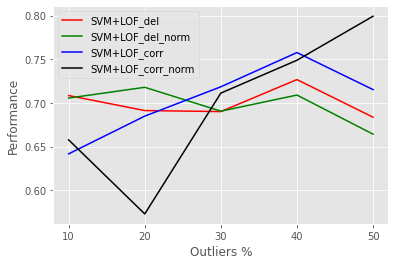

In [ ]:
#LOF
plt.plot(data_svm_LOF_deleted["outliers %"], data_svm_LOF_deleted["performance"], 'r', label='SVM+LOF_del')
plt.plot(data_svm_LOF_deleted_norm["outliers %"], data_svm_LOF_deleted_norm["performance"], 'g', label='SVM+LOF_del_norm')
plt.plot(data_svm_LOF_corrected["outliers %"], data_svm_LOF_corrected["performance"], 'b', label='SVM+LOF_corr')
plt.plot(data_svm_LOF_corrected_norm["outliers %"], data_svm_LOF_corrected_norm["performance"], 'k', label='SVM+LOF_corr_norm')

labels = ['10', '20', '30', '40', '50']
plt.xticks(data_svm_LOF_deleted["outliers %"], labels)
# Create legend.
plt.legend(loc='upper left')
plt.xlabel('Outliers %')
plt.ylabel('Performance')

Text(0, 0.5, 'Performance')

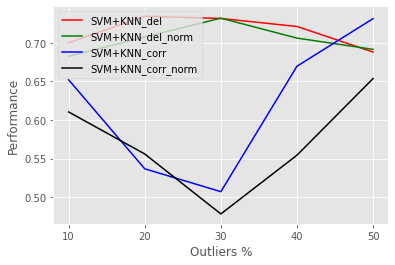

In [ ]:
#KNN
plt.plot(data_svm_KNN_deleted["outliers %"], data_svm_KNN_deleted["performance"], 'r', label='SVM+KNN_del')
plt.plot(data_svm_KNN_deleted_norm["outliers %"], data_svm_KNN_deleted_norm["performance"], 'g', label='SVM+KNN_del_norm')
plt.plot(data_svm_KNN_corrected["outliers %"], data_svm_KNN_corrected["performance"], 'b', label='SVM+KNN_corr')
plt.plot(data_svm_KNN_corrected_norm["outliers %"], data_svm_KNN_corrected_norm["performance"], 'k', label='SVM+KNN_corr_norm')

labels = ['10', '20', '30', '40', '50']
plt.xticks(data_svm_KNN_deleted["outliers %"], labels)
# Create legend.
plt.legend(loc='upper left')
plt.xlabel('Outliers %')
plt.ylabel('Performance')

Text(0, 0.5, 'Performance')

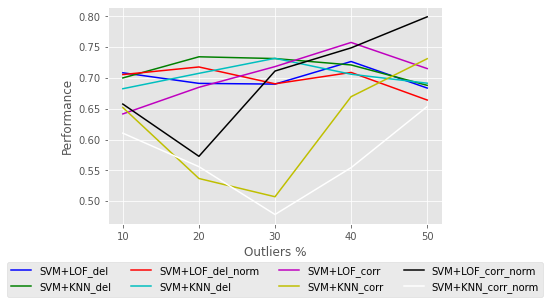

In [ ]:
#LOF vs KNN

plt.plot(data_svm_LOF_deleted["outliers %"], data_svm_LOF_deleted["performance"], 'b', label='SVM+LOF_del')
plt.plot(data_svm_KNN_deleted["outliers %"], data_svm_KNN_deleted["performance"], 'g', label='SVM+KNN_del')
plt.plot(data_svm_LOF_deleted_norm["outliers %"], data_svm_LOF_deleted_norm["performance"], 'r', label='SVM+LOF_del_norm')
plt.plot(data_svm_KNN_deleted_norm["outliers %"], data_svm_KNN_deleted_norm["performance"], 'c', label='SVM+KNN_del')
plt.plot(data_svm_LOF_corrected["outliers %"], data_svm_LOF_corrected["performance"], 'm', label='SVM+LOF_corr')
plt.plot(data_svm_KNN_corrected["outliers %"], data_svm_KNN_corrected["performance"], 'y', label='SVM+KNN_corr')
plt.plot(data_svm_LOF_corrected_norm["outliers %"], data_svm_LOF_corrected_norm["performance"], 'k', label='SVM+LOF_corr_norm')
plt.plot(data_svm_KNN_corrected_norm["outliers %"], data_svm_KNN_corrected_norm["performance"], 'w', label='SVM+KNN_corr_norm')

labels = ['10', '20', '30', '40', '50']
plt.xticks(data_svm_LOF_deleted["outliers %"], labels)

# Create legend.
#plt.legend(loc='upper left')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=4)
plt.xlabel('Outliers %')
plt.ylabel('Performance')

In [ ]:
#creating dataframes in order to plot the accuracy values respect the percentage of outliers injected

data_preDet_svm_LOF_deleted= {'outliers %': [10, 20, 30, 40, 50],'performance': [deleted_LOF_svm_10-svm_10_preDet, deleted_LOF_svm_20-svm_20_preDet, deleted_LOF_svm_30-svm_30_preDet, deleted_LOF_svm_40-svm_40_preDet, deleted_LOF_svm_50-svm_50_preDet]}
df_svm_LOF_deleted = pd.DataFrame(data_preDet_svm_LOF_deleted)

data_preDet_svm_KNN_deleted= {'outliers %': [10, 20, 30, 40, 50],'performance': [deleted_KNN_svm_10-svm_10_preDet, deleted_KNN_svm_20-svm_20_preDet, deleted_KNN_svm_30-svm_30_preDet, deleted_KNN_svm_40-svm_40_preDet, deleted_KNN_svm_50-svm_50_preDet]}
df_svm_KNN_deleted = pd.DataFrame(data_preDet_svm_KNN_deleted)

data_preDet_svm_LOF_deleted_norm= {'outliers %': [10, 20, 30, 40, 50],'performance': [deleted_norm_LOF_svm_10-svm_10_preDet, deleted_norm_LOF_svm_20-svm_20_preDet, deleted_norm_LOF_svm_30-svm_30_preDet, deleted_norm_LOF_svm_40-svm_40_preDet, deleted_norm_LOF_svm_50-svm_50_preDet]}
df_svm_LOF_deleted_norm = pd.DataFrame(data_preDet_svm_LOF_deleted_norm)

data_preDet_svm_KNN_deleted_norm= {'outliers %': [10, 20, 30, 40, 50],'performance': [deleted_norm_KNN_svm_10-svm_10_preDet, deleted_norm_KNN_svm_20-svm_20_preDet, deleted_norm_KNN_svm_30-svm_30_preDet, deleted_norm_KNN_svm_40-svm_40_preDet, deleted_norm_KNN_svm_50-svm_50_preDet]}
df_svm_KNN_deleted_norm = pd.DataFrame(data_preDet_svm_KNN_deleted_norm)

data_preDet_svm_LOF_corrected= {'outliers %': [10, 20, 30, 40, 50],'performance': [corrected_LOF_svm_10-svm_10_preDet, corrected_LOF_svm_20-svm_20_preDet, corrected_LOF_svm_30-svm_30_preDet, corrected_LOF_svm_40-svm_40_preDet, corrected_LOF_svm_50-svm_50_preDet]}
df_svm_LOF_corrected = pd.DataFrame(data_preDet_svm_LOF_corrected)

data_preDet_svm_KNN_corrected= {'outliers %': [10, 20, 30, 40, 50],'performance': [corrected_KNN_svm_10-svm_10_preDet, corrected_KNN_svm_20-svm_20_preDet, corrected_KNN_svm_30-svm_30_preDet, corrected_KNN_svm_40-svm_40_preDet, corrected_KNN_svm_50-svm_50_preDet]}
df_svm_KNN_corrected = pd.DataFrame(data_preDet_svm_KNN_corrected)

data_preDet_svm_LOF_corrected_norm= {'outliers %': [10, 20, 30, 40, 50],'performance': [corrected_norm_LOF_svm_10-svm_10_preDet, corrected_norm_LOF_svm_20-svm_20_preDet, corrected_norm_LOF_svm_30-svm_30_preDet, corrected_norm_LOF_svm_40-svm_40_preDet, corrected_norm_LOF_svm_50-svm_50_preDet]}
df_svm_LOF_corrected_norm = pd.DataFrame(data_preDet_svm_LOF_corrected_norm)

data_preDet_svm_KNN_corrected_norm= {'outliers %': [10, 20, 30, 40, 50],'performance': [corrected_norm_KNN_svm_10-svm_10_preDet, corrected_norm_KNN_svm_20-svm_20_preDet, corrected_norm_KNN_svm_30-svm_30_preDet, corrected_norm_KNN_svm_40-svm_40_preDet, corrected_norm_KNN_svm_50-svm_50_preDet]}
df_svm_KNN_corrected_norm = pd.DataFrame(data_preDet_svm_KNN_corrected_norm)

Text(0, 0.5, 'Performance')

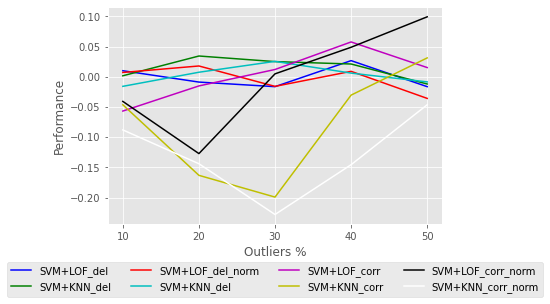

In [ ]:
#LOF vs KNN (compared to performance before outliers detection)

plt.plot(data_preDet_svm_LOF_deleted["outliers %"], data_preDet_svm_LOF_deleted["performance"], 'b', label='SVM+LOF_del')
plt.plot(data_preDet_svm_KNN_deleted["outliers %"], data_preDet_svm_KNN_deleted["performance"], 'g', label='SVM+KNN_del')
plt.plot(data_preDet_svm_LOF_deleted_norm["outliers %"], data_preDet_svm_LOF_deleted_norm["performance"], 'r', label='SVM+LOF_del_norm')
plt.plot(data_preDet_svm_KNN_deleted_norm["outliers %"], data_preDet_svm_KNN_deleted_norm["performance"], 'c', label='SVM+KNN_del')
plt.plot(data_preDet_svm_LOF_corrected["outliers %"], data_preDet_svm_LOF_corrected["performance"], 'm', label='SVM+LOF_corr')
plt.plot(data_preDet_svm_KNN_corrected["outliers %"], data_preDet_svm_KNN_corrected["performance"], 'y', label='SVM+KNN_corr')
plt.plot(data_preDet_svm_LOF_corrected_norm["outliers %"], data_preDet_svm_LOF_corrected_norm["performance"], 'k', label='SVM+LOF_corr_norm')
plt.plot(data_preDet_svm_KNN_corrected_norm["outliers %"], data_preDet_svm_KNN_corrected_norm["performance"], 'w', label='SVM+KNN_corr_norm')

labels = ['10', '20', '30', '40', '50']
plt.xticks(data_preDet_svm_LOF_deleted["outliers %"], labels)

# Create legend.
#plt.legend(loc='upper left')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=4)
plt.xlabel('Outliers %')
plt.ylabel('Performance')

##Decision trees

In [103]:
#DT, outliers deleted
classification_DT(ds_dirty_noOut_LOF, target, "accuracy")

0.6167832167832168


0.6167832167832168

In [104]:
classification_DT(ds_dirty_noOut_KNN, target, "accuracy")

0.5933333333333334


0.5933333333333334

In [105]:
#DT, outliers deleted (norm)
classification_DT(ds_dirty_noOut_fromNorm_LOF, target, "accuracy")

0.5895522388059702


0.5895522388059702

In [106]:
classification_DT(ds_dirty_noOut_fromNorm_KNN, target, "accuracy")

0.5923076923076923


0.5923076923076923

In [107]:
#DT, outliers corrected with avg
classification_DT(ds_dirty_outFix_LOF_noNan, target, "accuracy")

0.7632


0.7632

In [108]:
classification_DT(ds_dirty_outFix_KNN_noNan, target, "accuracy")

0.7520000000000001


0.7520000000000001

In [109]:
#DT, outliers corrected with avg (norm)
classification_DT(ds_dirty_outFix_fromNorm_LOF_noNan, target, "accuracy")

0.7832000000000001


0.7832000000000001

In [110]:
classification_DT(ds_dirty_outFix_fromNorm_KNN_noNan, target, "accuracy")

0.7224


0.7224

In [111]:
#manually saved best results (accuracy metric)
#10%outliers: 
deleted_LOF_dt_10= 0.5876651982378855
deleted_KNN_dt_10= 0.6017543859649123
deleted_norm_LOF_dt_10= 0.5856540084388187
deleted_norm_KNN_dt_10= 0.6026905829596412
corrected_LOF_dt_10=0.64
corrected_KNN_dt_10= 0.6288
corrected_norm_LOF_dt_10= 0.6264000000000001
corrected_norm_KNN_dt_10= 0.6392
#20%outliers:
deleted_LOF_dt_20= 0.6107843137254901
deleted_KNN_dt_20= 0.6427860696517413
deleted_norm_LOF_dt_20= 0.5980198019801981
deleted_norm_KNN_dt_20= 0.6129353233830845
corrected_LOF_dt_20= 0.7071999999999999
corrected_KNN_dt_20= 0.7032
corrected_norm_LOF_dt_20= 0.6791999999999999
corrected_norm_KNN_dt_20= 0.6952
#30%outliers:
deleted_LOF_dt_30= 0.5844444444444444
deleted_KNN_dt_30= 0.6179775280898877
deleted_norm_LOF_dt_30= 0.5940476190476192
deleted_norm_KNN_dt_30= 0.5966480446927374
corrected_LOF_dt_30= 0.7016
corrected_KNN_dt_30= 0.7288
corrected_norm_LOF_dt_30= 0.7152000000000001
corrected_norm_KNN_dt_30= 0.7103999999999999
#40%outliers:
deleted_LOF_dt_40= 0.6226666666666667
deleted_KNN_dt_40= 0.6190476190476192
deleted_norm_LOF_dt_40= 0.6048780487804878
deleted_norm_KNN_dt_40= 0.5382550335570471
corrected_LOF_dt_40= 0.78
corrected_KNN_dt_40= 0.7712
corrected_norm_LOF_dt_40= 0.7975999999999999
corrected_norm_KNN_dt_40= 0.7607999999999999
#50%outliers:
deleted_LOF_dt_50= 0.5746268656716417
deleted_KNN_dt_50= 0.6288
deleted_norm_LOF_dt_50= 0.5641509433962264
deleted_norm_KNN_dt_50= 0.6155038759689923
corrected_LOF_dt_50= 0.776
corrected_KNN_dt_50= 0.8056000000000001
corrected_norm_LOF_dt_50= 0.8295999999999999
corrected_norm_KNN_dt_50= 0.7895999999999999

In [112]:
#creating dataframes in order to plot the accuracy values respect the percentage of outliers injected
data_dt_LOF_deleted= {'outliers %': [10, 20, 30, 40, 50],'performance': [deleted_LOF_dt_10, deleted_LOF_dt_20, deleted_LOF_dt_30, deleted_LOF_dt_40, deleted_LOF_dt_50]}
df_dt_LOF_deleted = pd.DataFrame(data_dt_LOF_deleted)

data_dt_KNN_deleted= {'outliers %': [10, 20, 30, 40, 50],'performance': [deleted_KNN_dt_10, deleted_KNN_dt_20, deleted_KNN_dt_30, deleted_KNN_dt_40, deleted_KNN_dt_50]}
df_dt_KNN_deleted = pd.DataFrame(data_dt_KNN_deleted)

data_dt_LOF_deleted_norm= {'outliers %': [10, 20, 30, 40, 50],'performance': [deleted_norm_LOF_dt_10, deleted_norm_LOF_dt_20, deleted_norm_LOF_dt_30, deleted_norm_LOF_dt_40, deleted_norm_LOF_dt_50]}
df_dt_LOF_deleted_norm = pd.DataFrame(data_dt_LOF_deleted_norm)

data_dt_KNN_deleted_norm= {'outliers %': [10, 20, 30, 40, 50],'performance': [deleted_norm_KNN_dt_10, deleted_norm_KNN_dt_20, deleted_norm_KNN_dt_30, deleted_norm_KNN_dt_40, deleted_norm_KNN_dt_50]}
df_dt_KNN_deleted_norm = pd.DataFrame(data_dt_KNN_deleted_norm)

data_dt_LOF_corrected= {'outliers %': [10, 20, 30, 40, 50],'performance': [corrected_LOF_dt_10, corrected_LOF_dt_20, corrected_LOF_dt_30, corrected_LOF_dt_40, corrected_LOF_dt_50]}
df_dt_LOF_corrected = pd.DataFrame(data_dt_LOF_corrected)

data_dt_KNN_corrected= {'outliers %': [10, 20, 30, 40, 50],'performance': [corrected_KNN_dt_10, corrected_KNN_dt_20, corrected_KNN_dt_30, corrected_KNN_dt_40, corrected_KNN_dt_50]}
df_dt_KNN_corrected = pd.DataFrame(data_dt_KNN_corrected)

data_dt_LOF_corrected_norm= {'outliers %': [10, 20, 30, 40, 50],'performance': [corrected_norm_LOF_dt_10, corrected_norm_LOF_dt_20, corrected_norm_LOF_dt_30, corrected_norm_LOF_dt_40, corrected_norm_LOF_dt_50]}
df_dt_LOF_corrected_norm = pd.DataFrame(data_dt_LOF_corrected_norm)

data_dt_KNN_corrected_norm= {'outliers %': [10, 20, 30, 40, 50],'performance': [corrected_norm_KNN_dt_10, corrected_norm_KNN_dt_20, corrected_norm_KNN_dt_30, corrected_norm_KNN_dt_40, corrected_norm_KNN_dt_50]}
df_dt_KNN_corrected_norm = pd.DataFrame(data_dt_KNN_corrected_norm)

Text(0, 0.5, 'Performance')

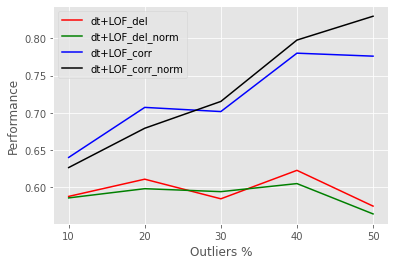

In [ ]:
#LOF
plt.plot(data_dt_LOF_deleted["outliers %"], data_dt_LOF_deleted["performance"], 'r', label='dt+LOF_del')
plt.plot(data_dt_LOF_deleted_norm["outliers %"], data_dt_LOF_deleted_norm["performance"], 'g', label='dt+LOF_del_norm')
plt.plot(data_dt_LOF_corrected["outliers %"], data_dt_LOF_corrected["performance"], 'b', label='dt+LOF_corr')
plt.plot(data_dt_LOF_corrected_norm["outliers %"], data_dt_LOF_corrected_norm["performance"], 'k', label='dt+LOF_corr_norm')

labels = ['10', '20', '30', '40', '50']
plt.xticks(data_dt_LOF_deleted["outliers %"], labels)
# Create legend.
plt.legend(loc='upper left')
plt.xlabel('Outliers %')
plt.ylabel('Performance')

Text(0, 0.5, 'Performance')

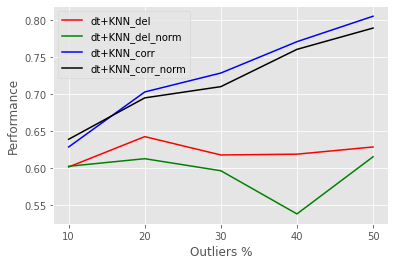

In [ ]:
#KNN
plt.plot(data_dt_KNN_deleted["outliers %"], data_dt_KNN_deleted["performance"], 'r', label='dt+KNN_del')
plt.plot(data_dt_KNN_deleted_norm["outliers %"], data_dt_KNN_deleted_norm["performance"], 'g', label='dt+KNN_del_norm')
plt.plot(data_dt_KNN_corrected["outliers %"], data_dt_KNN_corrected["performance"], 'b', label='dt+KNN_corr')
plt.plot(data_dt_KNN_corrected_norm["outliers %"], data_dt_KNN_corrected_norm["performance"], 'k', label='dt+KNN_corr_norm')

labels = ['10', '20', '30', '40', '50']
plt.xticks(data_dt_KNN_deleted["outliers %"], labels)
# Create legend.
plt.legend(loc='upper left')
plt.xlabel('Outliers %')
plt.ylabel('Performance')

Text(0, 0.5, 'Performance')

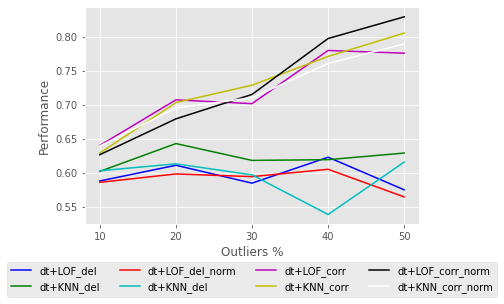

In [ ]:
#LOF vs KNN

plt.plot(data_dt_LOF_deleted["outliers %"], data_dt_LOF_deleted["performance"], 'b', label='dt+LOF_del')
plt.plot(data_dt_KNN_deleted["outliers %"], data_dt_KNN_deleted["performance"], 'g', label='dt+KNN_del')
plt.plot(data_dt_LOF_deleted_norm["outliers %"], data_dt_LOF_deleted_norm["performance"], 'r', label='dt+LOF_del_norm')
plt.plot(data_dt_KNN_deleted_norm["outliers %"], data_dt_KNN_deleted_norm["performance"], 'c', label='dt+KNN_del')
plt.plot(data_dt_LOF_corrected["outliers %"], data_dt_LOF_corrected["performance"], 'm', label='dt+LOF_corr')
plt.plot(data_dt_KNN_corrected["outliers %"], data_dt_KNN_corrected["performance"], 'y', label='dt+KNN_corr')
plt.plot(data_dt_LOF_corrected_norm["outliers %"], data_dt_LOF_corrected_norm["performance"], 'k', label='dt+LOF_corr_norm')
plt.plot(data_dt_KNN_corrected_norm["outliers %"], data_dt_KNN_corrected_norm["performance"], 'w', label='dt+KNN_corr_norm')

labels = ['10', '20', '30', '40', '50']
plt.xticks(data_dt_LOF_deleted["outliers %"], labels)

# Create legend.
#plt.legend(loc='upper left')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=4)
plt.xlabel('Outliers %')
plt.ylabel('Performance')

In [ ]:
#before outlier deletion/correction
data_preDet_dt_LOF_deleted= {'outliers %': [10, 20, 30, 40, 50],'performance': [deleted_LOF_dt_10-dt_10_preDet, deleted_LOF_dt_20-dt_20_preDet, deleted_LOF_dt_30-dt_30_preDet, deleted_LOF_dt_40-dt_40_preDet, deleted_LOF_dt_50-dt_50_preDet]}
df_dt_LOF_deleted = pd.DataFrame(data_preDet_dt_LOF_deleted)

data_preDet_dt_KNN_deleted= {'outliers %': [10, 20, 30, 40, 50],'performance': [deleted_KNN_dt_10-dt_10_preDet, deleted_KNN_dt_20-dt_20_preDet, deleted_KNN_dt_30-dt_30_preDet, deleted_KNN_dt_40-dt_40_preDet, deleted_KNN_dt_50-dt_50_preDet]}
df_dt_KNN_deleted = pd.DataFrame(data_preDet_dt_KNN_deleted)

data_preDet_dt_LOF_deleted_norm= {'outliers %': [10, 20, 30, 40, 50],'performance': [deleted_norm_LOF_dt_10-dt_10_preDet, deleted_norm_LOF_dt_20-dt_20_preDet, deleted_norm_LOF_dt_30-dt_30_preDet, deleted_norm_LOF_dt_40-dt_40_preDet, deleted_norm_LOF_dt_50-dt_50_preDet]}
df_dt_LOF_deleted_norm = pd.DataFrame(data_preDet_dt_LOF_deleted_norm)

data_preDet_dt_KNN_deleted_norm= {'outliers %': [10, 20, 30, 40, 50],'performance': [deleted_norm_KNN_dt_10-dt_10_preDet, deleted_norm_KNN_dt_20-dt_20_preDet, deleted_norm_KNN_dt_30-dt_30_preDet, deleted_norm_KNN_dt_40-dt_40_preDet, deleted_norm_KNN_dt_50-dt_50_preDet]}
df_dt_KNN_deleted_norm = pd.DataFrame(data_preDet_dt_KNN_deleted_norm)

data_preDet_dt_LOF_corrected= {'outliers %': [10, 20, 30, 40, 50],'performance': [corrected_LOF_dt_10-dt_10_preDet, corrected_LOF_dt_20-dt_20_preDet, corrected_LOF_dt_30-dt_30_preDet, corrected_LOF_dt_40-dt_40_preDet, corrected_LOF_dt_50-dt_50_preDet]}
df_dt_LOF_corrected = pd.DataFrame(data_preDet_dt_LOF_corrected)

data_preDet_dt_KNN_corrected= {'outliers %': [10, 20, 30, 40, 50],'performance': [corrected_KNN_dt_10-dt_10_preDet, corrected_KNN_dt_20-dt_20_preDet, corrected_KNN_dt_30-dt_30_preDet, corrected_KNN_dt_40-dt_40_preDet, corrected_KNN_dt_50-dt_50_preDet]}
df_dt_KNN_corrected = pd.DataFrame(data_preDet_dt_KNN_corrected)

data_preDet_dt_LOF_corrected_norm= {'outliers %': [10, 20, 30, 40, 50],'performance': [corrected_norm_LOF_dt_10-dt_10_preDet, corrected_norm_LOF_dt_20-dt_20_preDet, corrected_norm_LOF_dt_30-dt_30_preDet, corrected_norm_LOF_dt_40-dt_40_preDet, corrected_norm_LOF_dt_50-dt_50_preDet]}
df_dt_LOF_corrected_norm = pd.DataFrame(data_preDet_dt_LOF_corrected_norm)

data_preDet_dt_KNN_corrected_norm= {'outliers %': [10, 20, 30, 40, 50],'performance': [corrected_norm_KNN_dt_10-dt_10_preDet, corrected_norm_KNN_dt_20-dt_20_preDet, corrected_norm_KNN_dt_30-dt_30_preDet, corrected_norm_KNN_dt_40-dt_40_preDet, corrected_norm_KNN_dt_50-dt_50_preDet]}
df_dt_KNN_corrected_norm = pd.DataFrame(data_preDet_dt_KNN_corrected_norm)

Text(0, 0.5, 'Performance')

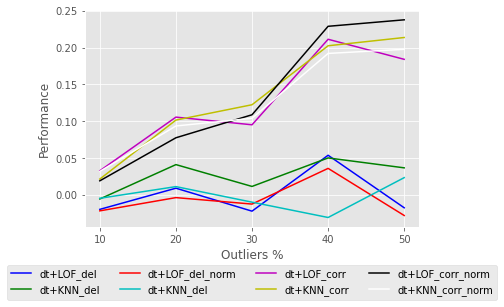

In [ ]:
#LOF vs KNN (compared to performance before outliers detection)

plt.plot(data_preDet_dt_LOF_deleted["outliers %"], data_preDet_dt_LOF_deleted["performance"], 'b', label='dt+LOF_del')
plt.plot(data_preDet_dt_KNN_deleted["outliers %"], data_preDet_dt_KNN_deleted["performance"], 'g', label='dt+KNN_del')
plt.plot(data_preDet_dt_LOF_deleted_norm["outliers %"], data_preDet_dt_LOF_deleted_norm["performance"], 'r', label='dt+LOF_del_norm')
plt.plot(data_preDet_dt_KNN_deleted_norm["outliers %"], data_preDet_dt_KNN_deleted_norm["performance"], 'c', label='dt+KNN_del')
plt.plot(data_preDet_dt_LOF_corrected["outliers %"], data_preDet_dt_LOF_corrected["performance"], 'm', label='dt+LOF_corr')
plt.plot(data_preDet_dt_KNN_corrected["outliers %"], data_preDet_dt_KNN_corrected["performance"], 'y', label='dt+KNN_corr')
plt.plot(data_preDet_dt_LOF_corrected_norm["outliers %"], data_preDet_dt_LOF_corrected_norm["performance"], 'k', label='dt+LOF_corr_norm')
plt.plot(data_preDet_dt_KNN_corrected_norm["outliers %"], data_preDet_dt_KNN_corrected_norm["performance"], 'w', label='dt+KNN_corr_norm')

labels = ['10', '20', '30', '40', '50']
plt.xticks(data_preDet_dt_LOF_deleted["outliers %"], labels)

# Create legend.
#plt.legend(loc='upper left')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=4)
plt.xlabel('Outliers %')
plt.ylabel('Performance')